In [130]:

import numpy as np
import pathlib as pl
import os
import pandas as pd
import warnings
warnings.simplefilter("ignore")
import pickle
import matplotlib.pyplot as plt
import imageio
import pathlib as pl

In [131]:
model = 'lvmogp' # 'lmc' 'MAP' 'VI' 'indi'
relationtype = 'non-linear_relation_two_observed_10_new' #'non-linear_relation_two_observed_six_new' #'linear_relation' #'unrelated'
seed = 1
# init_type = 'gpy'#'random_W_and_k_0' # 'gpy' #'random_W_and_k_1' #'random_W_and_k_0'
# restart = 1

In [132]:
path = pl.Path(os.getcwd()).parent/'Results/dataframes/'
results_list = []
for n_train in range(2,30):
    for restarts in [1, 2, 3]:
        if os.path.exists(path/f'{model}_{relationtype}_{n_train}_points_{seed}_seed_restart_{restarts}'):
            with open(path/f'{model}_{relationtype}_{n_train}_points_{seed}_seed_restart_{restarts}', 'rb') as f:
                df = pickle.load(f)
                df['n_train'] = n_train
                df['model'] = model
                df['seed'] = seed
                results_list.append(df)
results_df = pd.concat(results_list).reset_index()

In [133]:
restarts = []
n_points = []
init_types = []
for i in range(30):
    df = results_df[results_df['n_train'] == i]
    if len(df) > 0:
        restart = df.loc[df['elbo']==df['elbo'].max(), 'restart_no'].to_numpy()
        n_points.append(i)
        restarts.append(restart[0])
        init_type = df.loc[df['elbo']==df['elbo'].max(), 'index'].to_numpy()
        init_types.append(init_type[0])

In [134]:
init_types[0][4:]

'o_pca'

In [135]:
# save_path = pl.Path.home()/'gifs_RS021/' /f'{model}_{relationtype}_{seed}_seed_{init_type}_restart_{restart}.gif'
# path = pl.Path(os.getcwd()).parent/'plots/'
path = pl.Path(os.getcwd())/'plots'

if model == 'indi':
    filenames = [path / f'{model}_{relationtype}_{n_point}_points_{seed}_seed_restart_{restarts[i]}.png' for i, n_point in
                  enumerate(n_points)]
elif model== 'lmc':
    filenames = [path / f'{model}_{relationtype}_{n_point}_points_{seed}_seed_{init_types[i][4:]}_restart_{restarts[i]}.png' for i, n_point in
                  enumerate(n_points)]
elif model=='MAP':
    filenames = [path / f'{model}_GP_{init_types[i][4:]}_{relationtype}_{n_point}_points_{seed}_seed_restart_{restarts[i]}.png' for i, n_point in
                  enumerate(n_points)]
else:
    filenames = [path / f'{model}_GP_{init_types[i][3:]}_{relationtype}_{n_point}_points_{seed}_seed_restart_{restarts[i]}.png' for i, n_point in
                  enumerate(n_points)]

In [136]:
for filename in filenames:
    if not os.path.exists(filename):
        filenames.remove(filename)

# images = []
# for filename in filenames:
#     images.append(imageio.imread(filename))
# imageio.mimsave(pl.Path(os.getcwd())/'gifs/' /f'{model}_{relationtype}_{seed}_seed_{init_type}_restart_{restart}.png', images)


In [137]:
import glob
from PIL import Image

# filepaths
fp_in = filenames
fp_out = pl.Path.home()/'gifs_RS021/' /f'{model}_{relationtype}_{seed}_seed_best_elbo.gif'

# https://pillow.readthedocs.io/en/stable/handbook/image-file-formats.html#gif
imgs = (Image.open(f) for f in fp_in)
img = next(imgs)
imgs = [Image.open(f) for f in filenames]
img1 = imgs[0]
img1.save(fp=fp_out, format='GIF', append_images=imgs[1:],
         save_all=True, optimize=False, duration=1000, loop=0)



In [138]:
from packaging import version

if version.parse(Image.PILLOW_VERSION) < version.parse("3.4"):
    print("Pillow in version not supporting making animated gifs")
    print("you need to upgrade library version")
    print("see release notes in")
    print("https://pillow.readthedocs.io/en/latest/releasenotes/3.4.0.html#append-images-to-gif")

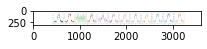

In [139]:
import matplotlib.pyplot as plt

import matplotlib.image as mpimg

img = mpimg.imread(fp_out)

plt.imshow(img)

In [140]:
path = pl.Path(os.getcwd()).parent/'plots/'
if model=='MAP':
    filenames = [path / f'{model}_latents_{init_types[i][4:]}_{relationtype}_{n_point}_points_{seed}_seed_restart_{restarts[i]}.png' for i, n_point in
                  enumerate(n_points)]
else:
    filenames = [path / f'{model}_latents_{init_types[i][3:]}_{relationtype}_{n_point}_points_{seed}_seed_restart_{restarts[i]}.png' for i, n_point in
                  enumerate(n_points)]

In [141]:
for filename in filenames:
    if not os.path.exists(filename):
        filenames.remove(filename)

In [142]:
filenames_hs = []
for i, n_point in enumerate(n_points):
    plt.rcParams["figure.figsize"] = [3, 3]
    im = plt.imread(filenames[i]) # insert local path of the image.
    fig, ax = plt.subplots()
    ax.annotate(f'{n_point}', (20, 35))
    ax.imshow(im)
    ax.axis('off')
    plt.savefig(pl.Path(os.getcwd())/'new_latent_plots'/f'{model}_GP_{relationtype}_'
                                                        f'{n_point}_points_{seed}_seed_restart.png')
    filenames_hs.append(pl.Path(os.getcwd())/'new_latent_plots'/f'{model}_GP_{relationtype}_'
                                                        f'{n_point}_points_{seed}_seed_restart.png')
    # plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/home/ruby/RS025_Synthetic_Experiments/plots/VI_latents_gpy_saturated_non-linear_relation_two_observed_10_new_3_points_1_seed_restart_1.png'

In [ ]:
import glob
from PIL import Image

# filepaths
fp_in = filenames
fp_out = pl.Path.home()/'gifs_RS021/' /f'{model}_latents_{relationtype}_{seed}_seed_best_elbo.gif'

# https://pillow.readthedocs.io/en/stable/handbook/image-file-formats.html#gif
imgs = (Image.open(f) for f in filenames_hs)
img = next(imgs)
imgs = [Image.open(f) for f in filenames_hs]
img1 = imgs[0]
img1.save(fp=fp_out, format='GIF', append_images=imgs[1:],
         save_all=True, optimize=False, duration=1000, loop=0)